<a href="https://colab.research.google.com/github/CubeVic/Machine_Learning/blob/main/%5BFreeCodeCamp%5D%5B004%5DPredict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

* Make sure to convert categorical data to numbers. 
* Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.
* `pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
dataset_path = keras.utils.get_file("insurance.csv", "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv")
dataset = pd.read_csv(dataset_path)
dataset.tail()

Exception: ignored

In [ ]:
# solve the issue of forbidden download
# provide the option to upload a file
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

Saving insurance.csv to insurance.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [ ]:
import seaborn as sns

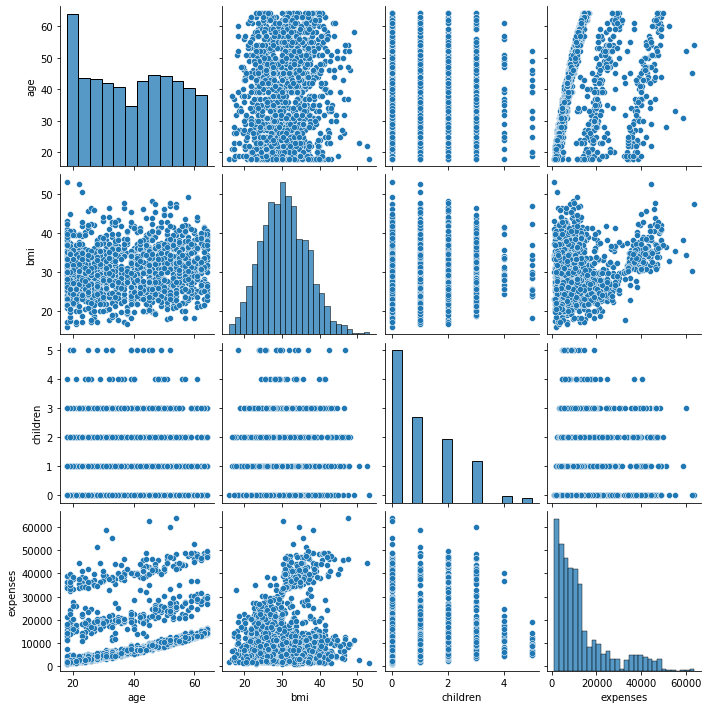

In [ ]:
sns.pairplot(dataset)

In [ ]:
# check there is no NaN values
dataset.isna().sum()

age                 0
bmi                 0
children            0
expenses            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
# transform categorical data to numerical
dataset = pd.get_dummies(dataset)
dataset

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [ ]:
#get 80% of the dataset as training data
train_dataset = dataset.sample(frac=0.8, random_state=0)

In [ ]:
# get 20% of the dataset as test data, using the indexes of the train data 
# to drop the items that are already in train_data
test_dataset = dataset.drop(train_dataset.index)

Split the data from the labels

In [ ]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

**Normalization of the data**
1. we will explore the Dataset to check the scale of eact feature and see if there is necessary to normalize it.



In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
sex_female,1070.0,0.501869,0.500230,0.0,0.0,1.0,1.0,1.0
sex_male,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
smoker_no,1070.0,0.800935,0.399484,0.0,1.0,1.0,1.0,1.0
smoker_yes,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region_northeast,1070.0,0.248598,0.432402,0.0,0.0,0.0,0.0,1.0
region_northwest,1070.0,0.235514,0.424518,0.0,0.0,0.0,0.0,1.0
region_southeast,1070.0,0.281308,0.449848,0.0,0.0,0.0,1.0,1.0


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

To normalize the data first we need to cast it as an `np.array`

In [ ]:
train_dataset_normalized = np.array(train_dataset)

In [ ]:
train_dataset_normalized

array([[52. , 30.2,  1. , ...,  0. ,  0. ,  1. ],
       [47. , 29.4,  1. , ...,  0. ,  1. ,  0. ],
       [48. , 40.6,  2. , ...,  1. ,  0. ,  0. ],
       ...,
       [42. , 26.6,  0. , ...,  1. ,  0. ,  0. ],
       [37. , 26.4,  0. , ...,  0. ,  1. ,  0. ],
       [57. , 28.1,  0. , ...,  0. ,  0. ,  1. ]])

In [ ]:
normalizer = preprocessing.Normalization(input_shape=[11,])

In [ ]:
normalizer.adapt(train_dataset_normalized)

In [ ]:
print(normalizer(train_dataset_normalized).numpy())

[[ 0.917091   -0.088627   -0.07718706 ... -0.5550391  -0.6256336
   1.8063632 ]
 [ 0.56337196 -0.22058904 -0.07718706 ... -0.5550391   1.5983796
  -0.5535985 ]
 [ 0.63411576  1.6268766   0.7487145  ...  1.8016746  -0.6256336
  -0.5535985 ]
 ...
 [ 0.20965287 -0.68245536 -0.9030886  ...  1.8016746  -0.6256336
  -0.5535985 ]
 [-0.1440662  -0.71544594 -0.9030886  ... -0.5550391   1.5983796
  -0.5535985 ]
 [ 1.2708101  -0.4350269  -0.9030886  ... -0.5550391  -0.6256336
   1.8063632 ]]


In [ ]:
model = tf.keras.Sequential([
                             normalizer,
                             layers.Dense(64, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(units=1)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',  metrics=['mae','mse'])

In [ ]:
history = model.fit(train_dataset, train_labels,epochs=200,verbose=0)

In [ ]:
model.evaluate(test_dataset, test_labels, verbose=2)


9/9 - 0s - loss: 2189.7808 - mae: 2189.7808 - mse: 32832298.0000


[2189.78076171875, 2189.78076171875, 32832298.0]

In [ ]:
history

9/9 - 0s - loss: 2189.7808 - mae: 2189.7808 - mse: 32832298.0000
Testing set Mean Abs Error: 2189.78 expenses
You passed the challenge. Great job!


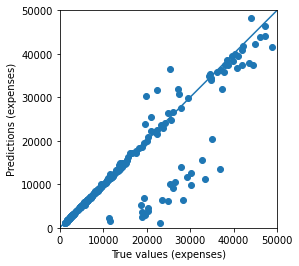

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
